In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
data = pd.read_csv("../energydata_complete.csv")

In [3]:
data.shape

(19735, 29)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
data_2 = data.drop(['date', 'lights'], axis=1)

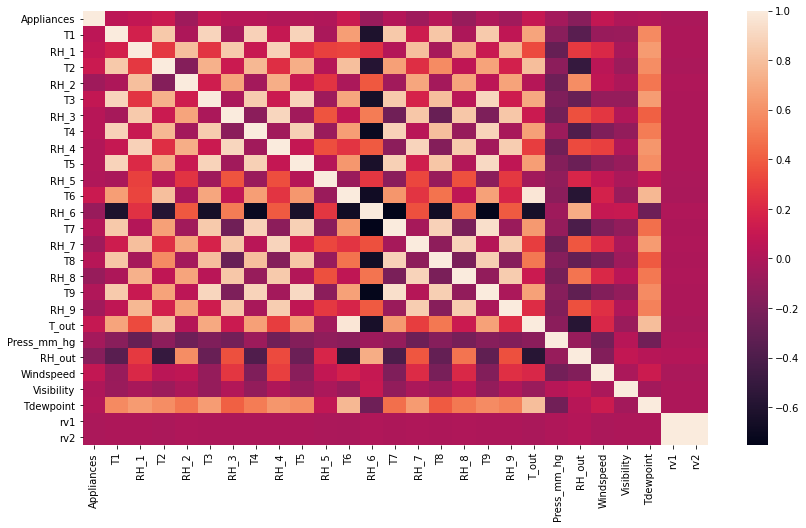

In [6]:
plt.figure(figsize=(14, 8))
sns.heatmap(data_2.corr())

In [7]:
X = data_2.drop('Appliances', axis=1)
y = data_2['Appliances']

In [8]:
#Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
#Scaling the data set
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [55]:
#Regression model of T2 on T6
T2_X = data_2.T2
T6_Y = data_2.T6
x_tr, x_te, y_tr, y_te = train_test_split(T2_X, T6_Y, test_size=0.3, random_state=42)
x_tr_scaled = scaler.fit_transform(x_tr.values.reshape(-1,1))
x_te_scaled = scaler.fit_transform(x_te.values.reshape(-1,1))
reg_0 = LinearRegression()
reg_0.fit(x_tr_scaled, y_tr)
reg_0.score(x_te_scaled, y_te).round(2)

0.64

In [41]:
reg = LinearRegression()
reg.fit(x_train_scaled, y_train)
#Coefficient of determination/R-Squared
reg.score(x_test_scaled, y_test).round(2)

0.15

In [46]:
#Mean Absolute Error
mean_absolute_error(y_test, reg.predict(x_test_scaled)).round(2)

53.64

In [45]:
#Residual Sum of Squares
np.sum(np.square(y_test-reg.predict(x_test_scaled))).round(2)

51919428.82

In [44]:
#Root MEan squared error
np.sqrt(mean_squared_error(y_test, reg.predict(x_test_scaled))).round(3)

93.641

In [37]:
x_train_scaled

array([[0.49736008, 0.28300439, 0.12284953, ..., 0.19318182, 0.72450918,
        0.72450918],
       [0.28616684, 0.57686404, 0.18899927, ..., 0.34393939, 0.86401848,
        0.86401848],
       [0.42238648, 0.27554825, 0.0574267 , ..., 0.15909091, 0.49942021,
        0.49942021],
       ...,
       [0.36958817, 0.28541667, 0.15265326, ..., 0.16666667, 0.38128609,
        0.38128609],
       [0.5279831 , 0.2808114 , 0.31504725, ..., 0.11515152, 0.02074813,
        0.02074813],
       [0.47870468, 0.35219298, 0.27550279, ..., 0.49772727, 0.34896874,
        0.34896874]])

In [28]:
reg.coef_

array([-3.51072478e+00,  4.95576690e+02, -2.53004991e+02, -4.69776321e+02,
        3.11137198e+02,  1.02823008e+02,  3.11060401e+01,  2.73646586e+01,
       -1.66770025e+01,  1.70547244e+01,  2.52749158e+02,  4.07121981e+01,
        1.08317762e+01, -4.74982830e+01,  1.09166925e+02, -1.68670744e+02,
       -2.03209377e+02, -4.25986982e+01, -3.44447701e+02,  7.35016926e+00,
       -8.31418508e+01,  3.12531642e+01,  1.31445490e+01,  1.25474064e+02,
       -2.05409586e+14,  2.05409586e+14])

In [29]:
x_train.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'],
      dtype='object')

In [31]:
#Creating a dataframe for the coeficients with their respective values
coefss = pd.DataFrame({'feature':x_train.columns, 'coef':reg.coef_})

In [33]:
#Sorting the dataframe
coefss.sort_values(by='coef')

,feature,coef
24,rv1,-2.054096e+14
3,RH_2,-4.697763e+02
18,T_out,-3.444477e+02
2,T2,-2.530050e+02
16,T9,-2.032094e+02
15,RH_8,-1.686707e+02
20,RH_out,-8.314185e+01
13,RH_7,-4.749828e+01
17,RH_9,-4.259870e+01
8,T5,-1.667700e+01


In [48]:
#Creating the ridge regression model
ridge_1 = Ridge(alpha=0.4)
ridge_1.fit(x_train_scaled, y_train)
#Root MEan squared error for the ridge regression
np.sqrt(mean_squared_error(y_test, ridge_1.predict(x_test_scaled))).round(3)

93.66

In [49]:
#Creating the lasso regression model
lasso_1 = Lasso(alpha=0.001)
lasso_1.fit(x_train_scaled, y_train)
lasso_1.coef_

array([-4.05585856e+00,  4.94326194e+02, -2.49638653e+02, -4.65821050e+02,
        3.10200156e+02,  1.02172472e+02,  3.03442054e+01,  2.65605806e+01,
       -1.71130125e+01,  1.70135558e+01,  2.49833620e+02,  4.00909631e+01,
        1.03049176e+01, -4.72096100e+01,  1.08879691e+02, -1.68697937e+02,
       -2.02480809e+02, -4.24460529e+01, -3.32573565e+02,  7.28122335e+00,
       -7.79887791e+01,  3.13880250e+01,  1.30781313e+01,  1.18062594e+02,
        1.63099462e+00,  3.67988414e-15])

No zero coefficients were given. Hence, no. of features with non-zero feature weights are - len(x_train_scaled.columns)

In [50]:
#Root MEan squared error for the lasso regression
np.sqrt(mean_squared_error(y_test, lasso_1.predict(x_test_scaled))).round(3)

93.641

Same RMSE as linear regression